In [42]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Documents/Projects/pfdelta/data_generation`


In [43]:
import PowerModels
import PowerModels: ref, var, ids
const PM = PowerModels
import JuMP
import Ipopt
include("src/build_opf_pfdelta.jl")

variable_branch_power_pfdelta (generic function with 1 method)

In [44]:
# Experiment # 1: disconnect slack generator
slack_gen = "1"
net_exp1 = PM.parse_matpower("pglib/pglib_opf_case5_pjm.m")
net_exp1["gen"][slack_gen]["gen_status"] = 0
pm_default = PM.instantiate_model(net_exp1, PM.ACPPowerModel, PM.build_opf)
result_default = PM.optimize_model!(pm_default, optimizer=Ipopt.Optimizer)
result_default

[info | PowerModels]: extending matpower format with data: areas 1x3
[info | PowerModels]: removing 1 cost terms from generator 4: [4000.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 1: [1400.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 5: [1000.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 2: [1500.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 3: [3000.0, 0.0]
This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      153
Number of nonzeros in inequality constraint Jacobian.:       48
Number of nonzeros in Lagrangian Hessian.............:      264

Total number of variables............................:       42
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       37
                     va

Dict{String, Any} with 8 entries:
  "solve_time"         => 0.016309
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => 17680.2
  "solution"           => Dict{String, Any}("baseMVA"=>100.0, "branch"=>Dict{St…
  "objective_lb"       => -Inf

In [45]:
result_default["solution"]["gen"]

Dict{String, Any} with 4 entries:
  "4" => Dict{String, Any}("qg"=>-0.0495998, "pg"=>0.0)
  "5" => Dict{String, Any}("qg"=>-1.42235, "pg"=>4.96076)
  "2" => Dict{String, Any}("qg"=>1.275, "pg"=>1.7)
  "3" => Dict{String, Any}("qg"=>3.9, "pg"=>3.3898)

In [46]:
pm_our = PM.instantiate_model(net_exp1, PM.ACPPowerModel, build_opf_power_flow_delta)
result_our = PM.optimize_model!(pm_our, optimizer=Ipopt.Optimizer)
result_our

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      153
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      240

Total number of variables............................:       42
                     variables with only lower bounds:        1
                variables with lower and upper bounds:        7
                     variables with only upper bounds:        0
Total number of equality constraints.................:       35
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

Dict{String, Any} with 8 entries:
  "solve_time"         => 0.0107651
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => 12787.6
  "solution"           => Dict{String, Any}("baseMVA"=>100.0, "branch"=>Dict{St…
  "objective_lb"       => -Inf

In [47]:
result_default["solution"]["gen"]

Dict{String, Any} with 4 entries:
  "4" => Dict{String, Any}("qg"=>-0.0495998, "pg"=>0.0)
  "5" => Dict{String, Any}("qg"=>-1.42235, "pg"=>4.96076)
  "2" => Dict{String, Any}("qg"=>1.275, "pg"=>1.7)
  "3" => Dict{String, Any}("qg"=>3.9, "pg"=>3.3898)

In [48]:
pm = PM.instantiate_model(net, PM.ACPPowerModel, build_opf_power_flow_delta)
print(pm.model)

UndefVarError: UndefVarError: `net` not defined

In [49]:
result = PM.optimize_model!(pm, optimizer=Ipopt.Optimizer)

UndefVarError: UndefVarError: `pm` not defined

In [50]:
result["solution"]["gen"]

Dict{String, Any} with 4 entries:
  "4" => Dict{String, Any}("qg"=>-0.0495998, "pg"=>0.0)
  "5" => Dict{String, Any}("qg"=>-1.42235, "pg"=>4.96076)
  "2" => Dict{String, Any}("qg"=>1.275, "pg"=>1.7)
  "3" => Dict{String, Any}("qg"=>3.9, "pg"=>3.3898)

In [51]:
# Experiment 2: disconnect graph
net_exp2 = PM.parse_matpower("pglib/pglib_opf_case5_pjm.m")
net_exp2["branch"]["1"]["br_status"] = 0
net_exp2["branch"]["4"]["br_status"] = 0
pm2_default = PM.instantiate_model(net_exp2, PM.ACPPowerModel, PM.build_opf)
result2_default = PM.optimize_model!(pm2_default, optimizer=Ipopt.Optimizer)
result2_default

[info | PowerModels]: extending matpower format with data: areas 1x3
[info | PowerModels]: removing 1 cost terms from generator 4: [4000.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 1: [1400.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 5: [1000.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 2: [1500.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 3: [3000.0, 0.0]
This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      107
Number of nonzeros in inequality constraint Jacobian.:       32
Number of nonzeros in Lagrangian Hessian.............:      176

Total number of variables............................:       36
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       31
                     va

Dict{String, Any} with 8 entries:
  "solve_time"         => 0.024055
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_INFEASIBLE
  "dual_status"        => UNKNOWN_RESULT_STATUS
  "primal_status"      => INFEASIBLE_POINT
  "objective"          => 12446.0
  "solution"           => Dict{String, Any}("baseMVA"=>100.0, "branch"=>Dict{St…
  "objective_lb"       => -Inf

In [52]:
result2_default["solution"]["branch"]

Dict{String, Any} with 4 entries:
  "5" => Dict{String, Any}("qf"=>0.282071, "qt"=>-0.283919, "pt"=>0.332074, "pf…
  "2" => Dict{String, Any}("qf"=>0.217922, "qt"=>-0.115812, "pt"=>-1.94318, "pf…
  "6" => Dict{String, Any}("qf"=>0.114344, "qt"=>0.0376218, "pt"=>2.39089, "pf"…
  "3" => Dict{String, Any}("qf"=>0.973776, "qt"=>-0.980758, "pt"=>1.86987, "pf"…

In [53]:
pm2_our = PM.instantiate_model(net_exp2, PM.ACPPowerModel, build_opf_power_flow_delta)
result2_our = PM.optimize_model!(pm2_default, optimizer=Ipopt.Optimizer)
result2_our

[warn | InfrastructureModels]: Model already contains optimizer, cannot use optimizer specified in `optimize_model!`
This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      107
Number of nonzeros in inequality constraint Jacobian.:       32
Number of nonzeros in Lagrangian Hessian.............:      176

Total number of variables............................:       36
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       31
                     variables with only upper bounds:        0
Total number of equality constraints.................:       27
Total number of inequality constraints...............:       16
        inequality constraints with only lower bounds:        4
   inequality constraints with lower and upper bounds:        0
        inequality constraints with

Dict{String, Any} with 8 entries:
  "solve_time"         => 0.0232999
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_INFEASIBLE
  "dual_status"        => UNKNOWN_RESULT_STATUS
  "primal_status"      => INFEASIBLE_POINT
  "objective"          => 12446.0
  "solution"           => Dict{String, Any}("baseMVA"=>100.0, "branch"=>Dict{St…
  "objective_lb"       => -Inf

In [54]:
result2_our["solution"]["branch"]

Dict{String, Any} with 4 entries:
  "5" => Dict{String, Any}("qf"=>0.282071, "qt"=>-0.283919, "pt"=>0.332074, "pf…
  "2" => Dict{String, Any}("qf"=>0.217922, "qt"=>-0.115812, "pt"=>-1.94318, "pf…
  "6" => Dict{String, Any}("qf"=>0.114344, "qt"=>0.0376218, "pt"=>2.39089, "pf"…
  "3" => Dict{String, Any}("qf"=>0.973776, "qt"=>-0.980758, "pt"=>1.86987, "pf"…

In [55]:
# Experiment # 3: what happens when you get rid of all gens?
net_exp3 = PM.parse_matpower("pglib/pglib_opf_case14_ieee.m")
net_exp3["gen"]["4"]["gen_status"] = 0
pm3_default = PM.instantiate_model(net_exp3, PM.ACPPowerModel, PM.build_opf)
result3_default = PM.optimize_model!(pm3_default, optimizer=Ipopt.Optimizer)
result3_default

[info | PowerModels]: removing 3 cost terms from generator 4: Float64[]
[info | PowerModels]: removing 1 cost terms from generator 1: [792.0951, 0.0]
[info | PowerModels]: removing 3 cost terms from generator 5: Float64[]
[info | PowerModels]: removing 1 cost terms from generator 2: [2326.9494, 0.0]
[info | PowerModels]: removing 3 cost terms from generator 3: Float64[]
This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      488
Number of nonzeros in inequality constraint Jacobian.:      160
Number of nonzeros in Lagrangian Hessian.............:      881

Total number of variables............................:      114
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      100
                     variables with only upper bounds:        0
Total number of equality constraint

Dict{String, Any} with 8 entries:
  "solve_time"         => 0.021179
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => 2179.53
  "solution"           => Dict{String, Any}("baseMVA"=>100.0, "branch"=>Dict{St…
  "objective_lb"       => -Inf

In [56]:
result3_default

Dict{String, Any} with 8 entries:
  "solve_time"         => 0.021179
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => 2179.53
  "solution"           => Dict{String, Any}("baseMVA"=>100.0, "branch"=>Dict{St…
  "objective_lb"       => -Inf

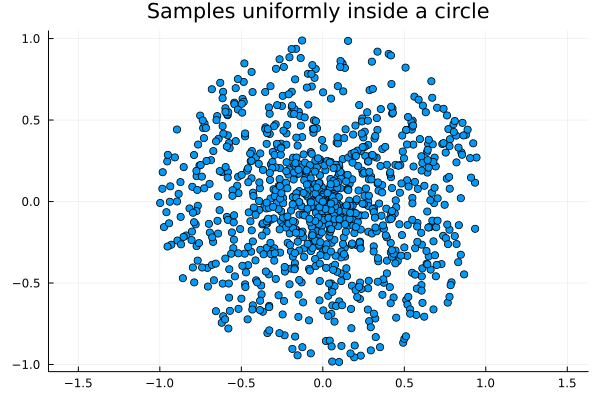

In [7]:
# Checking ball sampling
using Random
using Plots
import LinearAlgebra: diag, eigvals, I, cholesky, norm, Hermitian, dot, norm, logdet

include("src/pf_delta_perturbations.jl")

# Set parameters
center = [0.0, 0.0]  # center of the circle
radius = 1.0         # radius of the circle
num_samples = 1000   # number of samples

# Generate samples
samples = [sample_ball(center, radius) for _ in 1:num_samples]

# Split samples into x and y for plotting
x_vals = [s[1] for s in samples]
y_vals = [s[2] for s in samples]

# Plot
scatter(x_vals, y_vals, aspect_ratio=1, label="", title="Samples uniformly inside a circle")

In [ ]:
# Testing out the new dataset class

root = '../my_results/2025-04-24_21-18-06' # double-check path
dataset_1 = PFDeltaDataset(
    root_dir=root,
    split='all', 

    case_name=selected_case, # verify path here,
    # topological_perturbations=True, # this has to be added to the class: have it load the correct perturbation?
    force_reload=False
)

dataset_2 =  PFDeltaDataset(
    root_dir=root,
    split='all', 
    case_name=selected_case, # verify path here,
    # topological_perturbations=True, # this has to be added to the class: have it load the correct perturbation?
    force_reload=False,
    add_bus_type=True
)